In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy as sp

u = lambda x: exp(x)*(x**2 - 1)
uxx = lambda x: exp(x)*(x**2 + 4*x + 1)
f = lambda x: uxx(x) + u(x)**5
u_guess = lambda x: (x+1)*(x+1)*(x-1)


In [ ]:
def func(U, D, F):
    d2U = np.dot(D, U)
    U5 = [u**5 for u in U]
    G = d2U + U5 - F
    G[0] = U[0]
    G[-1] = U[-1]
    return G

def fprime(U, D):
    n = len(U)
    dF = np.zeros((n, n))
    dF[1:-1,:] = D[1:-1,:]
    dF[0,0] = 1
    dF[-1,-1] = 1
    U4 = [u**4 for u in U]
    for i in range (1,n-1):
        dF[i,i] += 5*U4[i]
    return dF

In [ ]:
def chebyshev_derivative(x,n):
    c=np.ones((n+1))
    c[0]=2
    c[n]=2

    D=np.empty((n+1,n+1))
    D[0,0]=(2*n*n+1)/6
    for i in range(1,n):
        D[i,i]=-0.5*x[i]/(1-x[i]*x[i])
    D[n,n]=-D[0,0]

    for i in range(n+1):
        for j in range(n+1):
            if i!=j:
                D[i,j]=c[i]*(-1)**(i+j)/(c[j]*(x[i]-x[j]))

    D2 = np.matmul(D, D)
    return D2

def chebyshev_points(n):
    return np.cos(np.linspace(0, pi, n+1))

def err(E):
    return sqrt(np.dot(E, E))

In [ ]:
def solve(n):
    tol = 1e-10
    e = 1
    MAX_ITER = 1000000

    x = chebyshev_points(n)
    U = np.asarray([u(xx) for xx in x])

    u0 = [u_guess(xx) for xx in x]
    D = chebyshev_derivative(x, n)

    F = [f(xx) for xx in x]
    G = func(u0, D, F)
    J = fprime(u0, D)

    uk = np.asarray(u0)
    cnt = 0
    while (e > tol) or (cnt == MAX_ITER):
        du = np.linalg.inv(J).dot(G)
        uk -= du
        G = func(uk, D, F)
        J = fprime(uk, D)
        e = np.linalg.norm(du, 2)/np.linalg.norm(uk,2)
        cnt += 1
    return err(U-uk)

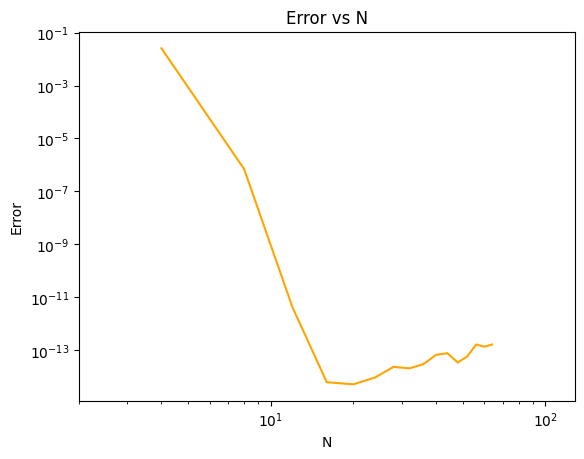

In [ ]:
E = []
N = [4*i for i in range (1,17)]
for n in N:
    E.append(solve(n))

plt.loglog(N, E, color = 'orange')
plt.xlim([2, 2**7])
plt.xlabel('N')
plt.ylabel('Error')
plt.title ('Error vs N')
plt.show()